# A quick pandas based zooming class
#### (1) Import stuff

In [2]:
import sklearn.datasets # for iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import root_pandas as rp #if we want to save as root_ntuple
import matplotlib
from matplotlib import rc #for custom label formatting
'''Make larger axes labels for plots for papers and such'''
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams["figure.titlesize"] = 30
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)

Welcome to JupyROOT 6.22/02


#### (2) Initialize class

In [3]:
class VisualAnalysis:
    def __init__(self, zoom_column = 'sepal_length', zoom_min = None, zoom_max = None, save_dataframe = False):
        ''' Default arguments are None which will return a grid of histograms with the original data
        zoom_column defines the branch with which to zoom in
        zoom_min defines the minimum cut value for the branch
        zoom_max defines the maximum cut value for the branch'''
        self.base_data = self.load_data()
        self.plot_histograms(self.base_data) #plot histograms without cuts
        self.zoomed_data = self.zoom(column = zoom_column, min_value = zoom_min, max_value = zoom_max)
        if len(self.base_data) == len(self.zoomed_data): #don't plot zoomed histograms if we don't zoom in further
            pass
        else:
            self.plot_histograms(self.zoomed_data)
        if save_dataframe == True:
            self.save_zoomed_data(df = self.zoomed_data, path = './', filename = zoom_column + '_' + str(zoom_min) + '_' + str(zoom_max))
        
    def load_data(self): #for now just use iris
        data = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)[0] #loads as pandas dataframe
        data.columns = data.columns.str.replace(' ', '_') #replace spaces with underscores
        data.columns = data.columns.str.replace("_\(cm\)", '') #remove (cm)
        return data
    def plot_histograms(self,data):
        fig,ax = plt.subplots(2,2,figsize=(12,10))
        axs = [ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
        for i in range(0,len(axs)):
            axs[i].hist(data[data.columns[i]])
            axs[i].set_xlabel(data.columns[i])
            axs[i].grid()
        plt.tight_layout()
        if len(data) == len(self.base_data):
            fig.suptitle('Original Data')
        else:
            fig.suptitle('Zoomed Data')
        plt.subplots_adjust(top=0.85) #To make figure title clear
        plt.show()
    def zoom(self,column,min_value,max_value):
        original_data = self.base_data
        zoomed_data = original_data.copy() #not necessary for code to run, but avoids pandas warnings
        if min_value == None:
            min_value = original_data[column].min()
        if max_value == None:
            max_value = original_data[column].max()
        zoomed_data = zoomed_data.loc[(zoomed_data[column] >= min_value) & (zoomed_data[column] <= max_value)]
        zoomed_data['original_index'] = zoomed_data.index #store original index
        zoomed_data.index = [i for i in range(0,len(zoomed_data))] #reindex for convenience
        return zoomed_data
    def save_zoomed_data(self, df, path, filename, filetype = 'root'): #Default filetype is 'root'.
        df.to_root(path + filename+'.'+filetype, key='tree')
        

### Examples of using class interactively

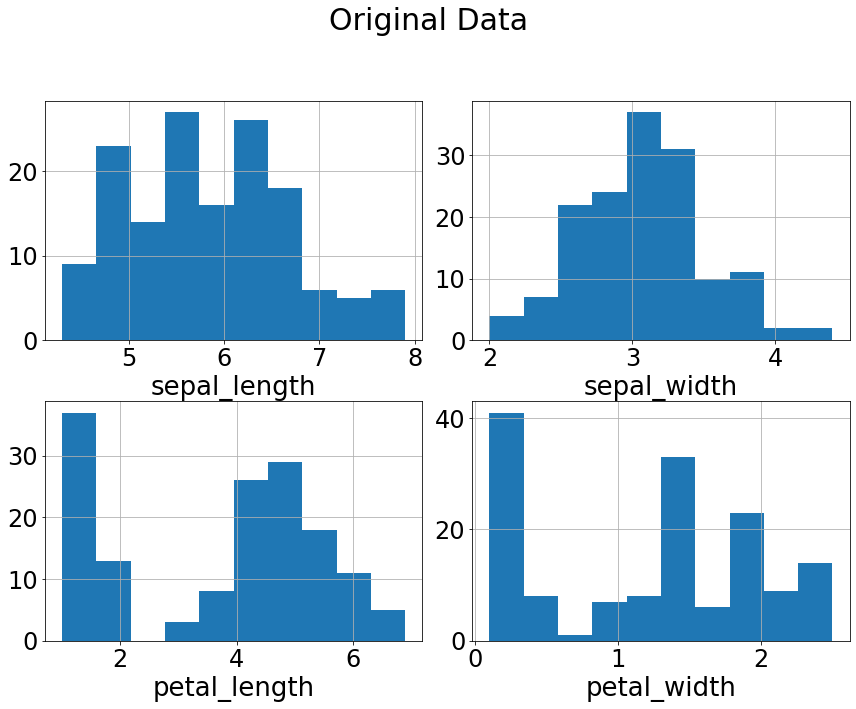

In [3]:
va = VisualAnalysis() #default arguments don't employ any cuts so only the original data is plotted

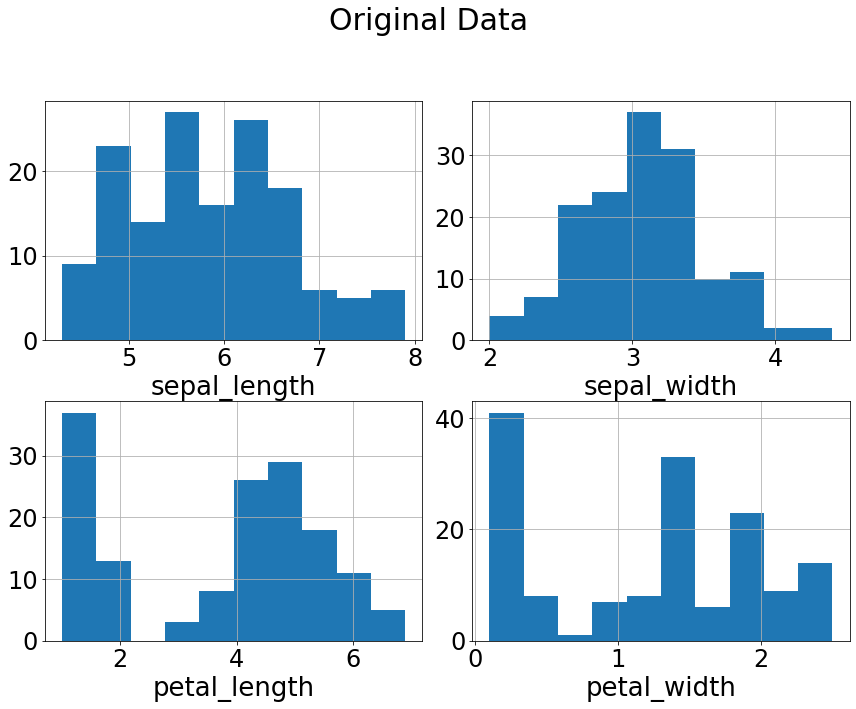

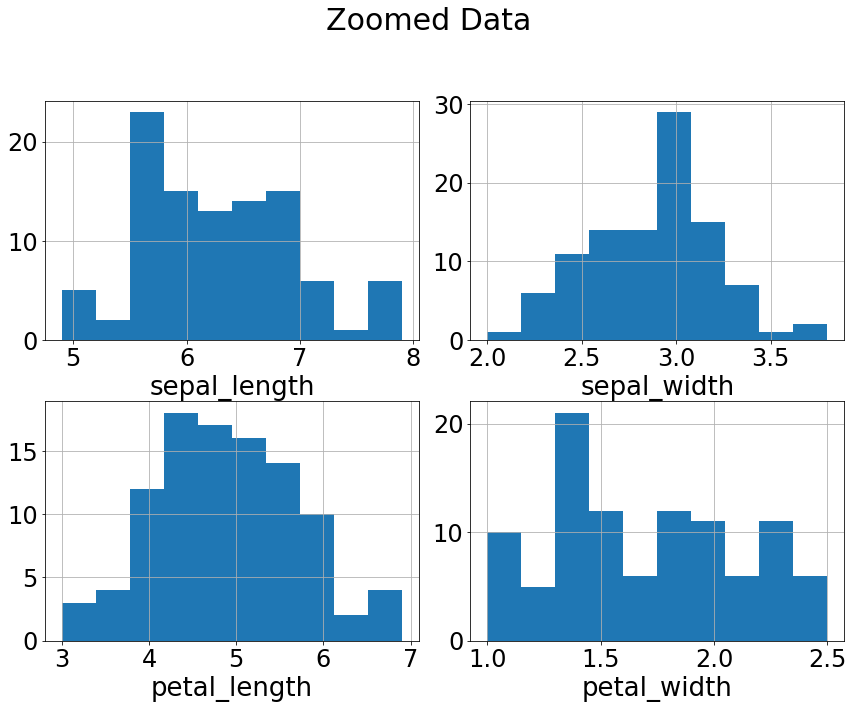

In [11]:
va = VisualAnalysis(zoom_column = 'petal_length', zoom_min = 3) #calls instance of class where petal length > 3cm

In [12]:
#We can now extract both the original and cut dataframe info
print(va.base_data) #original dataset

#You can always tab-complete va.  to see different options

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [13]:
print(va.zoomed_data) #cut dataset

    sepal_length  sepal_width  petal_length  petal_width  original_index
0            7.0          3.2           4.7          1.4              50
1            6.4          3.2           4.5          1.5              51
2            6.9          3.1           4.9          1.5              52
3            5.5          2.3           4.0          1.3              53
4            6.5          2.8           4.6          1.5              54
..           ...          ...           ...          ...             ...
95           6.7          3.0           5.2          2.3             145
96           6.3          2.5           5.0          1.9             146
97           6.5          3.0           5.2          2.0             147
98           6.2          3.4           5.4          2.3             148
99           5.9          3.0           5.1          1.8             149

[100 rows x 5 columns]


In [14]:
# Since these are dataframes we can do usual dataframe options
va.zoomed_data['sepal_width'] #this is the list of sepal widths where petal length > 3cm

0     3.2
1     3.2
2     3.1
3     2.3
4     2.8
     ... 
95    3.0
96    2.5
97    3.0
98    3.4
99    3.0
Name: sepal_width, Length: 100, dtype: float64

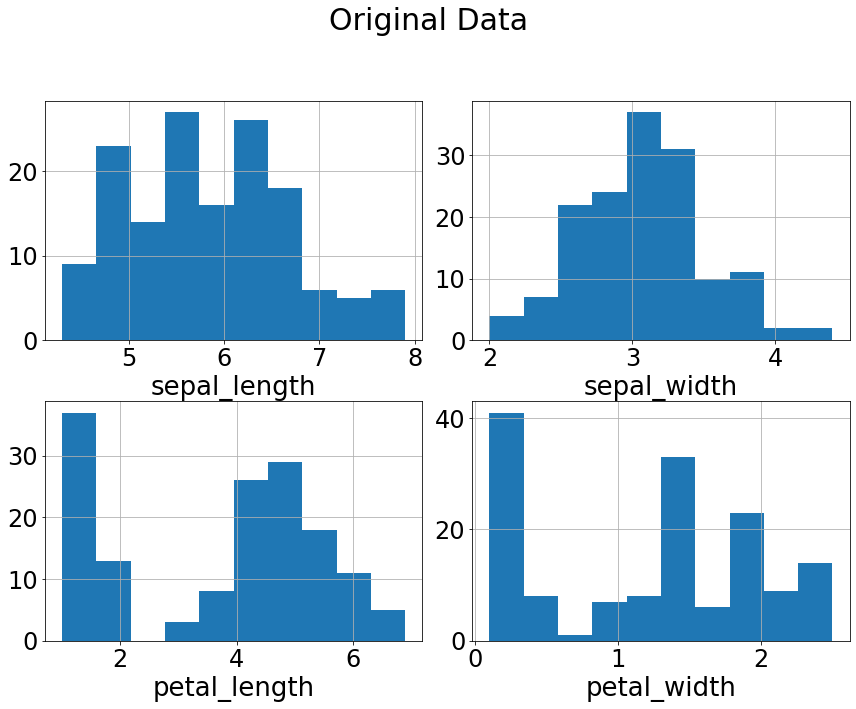

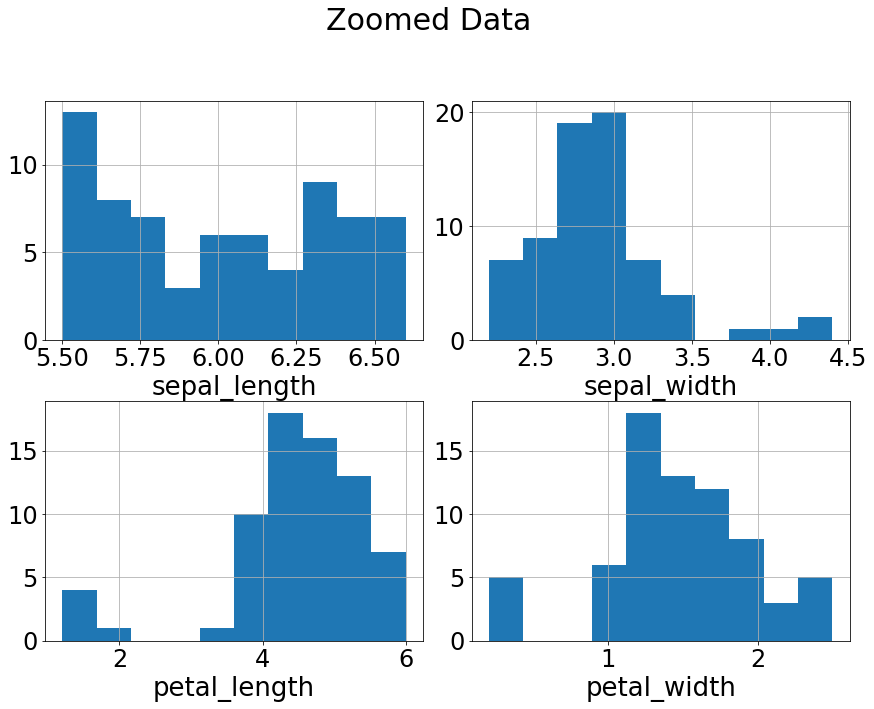

In [15]:
#Saves a root file of all data where 5.5cm <= sepal length <= 6.6cm
va = VisualAnalysis('sepal_length', 5.5, 6.6, save_dataframe = True)

In [16]:
#We can now read in this root file with
df = rp.read_root("sepal_length_5.5_6.6.root")
print(df)

    sepal_length  sepal_width  petal_length  petal_width  original_index
0            5.8          4.0           1.2          0.2              14
1            5.7          4.4           1.5          0.4              15
2            5.7          3.8           1.7          0.3              18
3            5.5          4.2           1.4          0.2              33
4            5.5          3.5           1.3          0.2              36
..           ...          ...           ...          ...             ...
65           5.8          2.7           5.1          1.9             142
66           6.3          2.5           5.0          1.9             146
67           6.5          3.0           5.2          2.0             147
68           6.2          3.4           5.4          2.3             148
69           5.9          3.0           5.1          1.8             149

[70 rows x 5 columns]


## ToDo

In it's current form, this class essentially allows you to look at the original data set and make a cut on single variable. It then will draw histograms of those and write the data if you ask it to. This base model isn't all that flexible and should be make both interactive and allow for cuts on multiple variables:

1. Make interactive
1a. Won't worry about GUI just yet
1b. Instead allow these functions in the VA class to operate live on dataframes. This isn't too difficult to do in python and this is what I plan to do next

2. Add in flexibility for cutting on multiple variables

3. Add in gui functonality

4. Generalize to non-Iris dataset